In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('ds_salaries.csv')

df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [10]:
linhas, colunas = df.shape

print('N de linhas: ', linhas)
print('N de linhas: ', colunas)

N de linhas:  607
N de linhas:  12


In [12]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [18]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [19]:
# tabela analitica
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [23]:
for col in df.columns:
    print("# Registros por colunas\n", df[col].value_counts())

# Registros por colunas
 0      1
399    1
401    1
402    1
403    1
      ..
203    1
204    1
205    1
206    1
606    1
Name: Unnamed: 0, Length: 607, dtype: int64
# Registros por colunas
 2022    318
2021    217
2020     72
Name: work_year, dtype: int64
# Registros por colunas
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
# Registros por colunas
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
# Registros por colunas
 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                     

In [24]:
# Plot de registros por ano
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

c:\Users\BRZN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='work_year', ylabel='Density'>

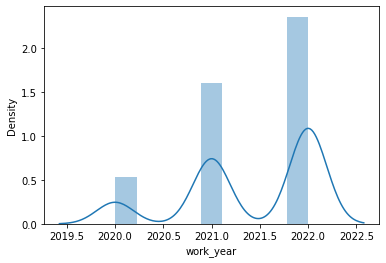

In [26]:
# Estamos verificando o padrão dos elementos unilaterais - dados Parcial
sns.distplot(df['work_year'])

In [28]:
# Conatgem por experiência - Level
k = df['experience_level'].value_counts()

k

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [29]:
# Setando o level como index e o resultado como level de experência
k.to_frame().reset_index()

,index,experience_level
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [30]:
# Contagem de registros por salary
df['salary'].value_counts()

100000     18
80000      18
120000     15
60000      15
150000     14
           ..
256000      1
39600       1
1335000     1
52500       1
129000      1
Name: salary, Length: 272, dtype: int64

<AxesSubplot:ylabel='salary_in_usd'>

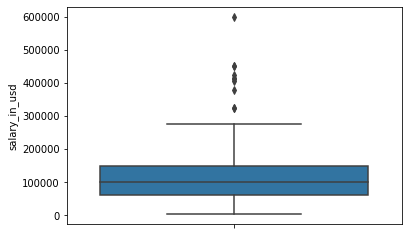

In [31]:
# Visão gráfica de boxplot por salary in usd
sns.boxplot(y="salary_in_usd", data=df)

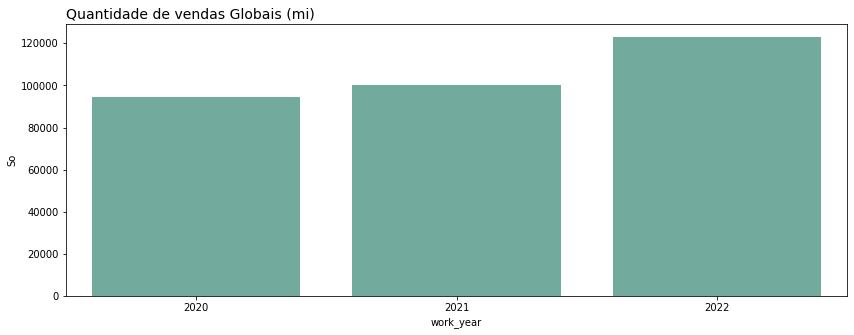

In [35]:
# Visão gráfica

# Tamanho da imagem
from statistics import median


plt.figure( figsize=(14, 5))

# Tutulo do gráfico
plt.title('Média de salário por ano', loc='left', fontsize=14 )

# Gráfico
sns.barplot( data=df, x='work_year', y='salary', ci=None, color='#69b3a2', estimator=median)

# Label = Legenda
plt.ylabel('Média');